# Financial Analysis 

## Import pandas which I used to read the bank statement dataset

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\DELL\Desktop\DataSets\Zenith_Bank_Statement.csv")

## Get information about the number of rows and columns

In [58]:
df.shape

(262, 6)

## View duplicates

In [59]:
df[df.duplicated(keep=False)]

,DATE,DESCRIPTION,DEBIT,CREDIT,VALUE DATE,BALANCE
89,18/02/2023,NIP CR/MOB/AYOKANMI TEMITOPE\nJIMOH/OPAY/Sheddy,1850.00,NaN,18/02/2023,18260.87
90,18/02/2023,NIP Charge + VAT,10.75,NaN,18/02/2023,18250.12
93,18/02/2023,NIP CR/MOB/AYOKANMI TEMITOPE\nJIMOH/OPAY/Sheddy,1850.00,NaN,18/02/2023,18260.87
94,18/02/2023,NIP Charge + VAT,10.75,NaN,18/02/2023,18250.12


## Drop duplicates

In [60]:
df = df.drop_duplicates()

## Get information about the datatypes of each columns and number of null values in each columns

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         260 non-null    object 
 1   DESCRIPTION  260 non-null    object 
 2   DEBIT        222 non-null    float64
 3   CREDIT       38 non-null     float64
 4   VALUE DATE   260 non-null    object 
 5   BALANCE      260 non-null    float64
dtypes: float64(3), object(3)
memory usage: 14.2+ KB


## Convert columns headers to lowercase

- This is a personal preference 
- Also convert description to lower case 

In [62]:
df_main = df.copy()

In [83]:
df_main.columns = df_main.columns.str.lower() # Converts all column headers to lower case

df_main['description'] = df_main['description'].map(str.lower) #converts description column to lower case


## Convert date and  columns to date data type

In [84]:
df_main['date'] = pd.to_datetime(df_main['date'], format='%d/%m/%Y')
df_main['value date'] = pd.to_datetime(df_main['value date'], format='%d/%m/%Y')

## Replace all NaN in debit and credit columns with 0

In [85]:
df_main[['debit', 'credit']] = df_main[['debit', 'credit']].fillna(0)

## Create a category column to categorize each transaction

In [66]:
df_main['category'] = 'miscellaneous'

#### Define all categories

- Bank Charges
- Airtime
- Eat outs
- Miscellaneous
- Rent
- Electric bills
- My baby
- Dt
- Selfcare

In [67]:
df_main['amount'] = df_main['credit'] - df_main['debit']

In [86]:

pd.options.display.max_rows = 265


# Bank Charge

df_main['category'] = np.where(df_main['description'].str.contains(
    'vat|electronic money transfer levy|sms notification charge|sms notification charge|visa card maintenance fee'), 
    'Bank charge', df_main['category'] )
    
# Airtime

df_main['category'] = np.where(df_main['description'].str.contains(
    'mtn|airtel|9mobile|08039646573'), 
    'Airtime', df_main['category'] )
                               
#Eat Outs

df_main['category'] = np.where(df_main['description'].str.contains(
    'yum delivery|yum\ndelivery|hasina confectionery|stone\ncastlerestaurant|/henry\nadebayo/fcmb/sheddy'), 
    'Eat outs', df_main['category'] )

#SelfCare

df_main['category'] = np.where(df_main['description'].str.contains(
    'chukwubueze paschal\nugwumba/opay|paystack|chukwubueze paschal|abdulsamad ayobami|chikwendu|ibrahim yakubu'), 
    'Selfcare', df_main['category'] )

#My_Gomoney

df_main['category'] = np.where(df_main['description'].str.contains(
    'shedrach\nnwali/gomon|ikenna\nshedrach/kuda|gomon'), 
    'Digital Wallets', df_main['category'] )

#My baby

df_main['category'] = np.where(df_main['description'].str.contains(
    'yunusa sarah\njenebu/gtb|yunusa sarah jenebu|khadija/gtb|jenebu'), 
    'My baby', df_main['category'] )

# DT

df_main['category'] = np.where(df_main['description'].str.contains(
    'daniel tolani|olorunyomi'), 
    'DT', df_main['category'] )

# Enike

df_main['category'] = np.where(df_main['description'].str.contains(
    'enike braimoh|enike\nbraimoh'), 
    'enike braimoh', df_main['category'] )

# Mom

df_main['category'] = np.where(df_main['description'].str.contains(
    'blessing\nnwali|blessing nwali'), 
    'Mom', df_main['category'] )

# Aunty Helen

df_main['category'] = np.where(df_main['description'].str.contains(
    'helen chicka'), 
    'Aunty Helen', df_main['category'] )


# Dad

df_main['category'] = np.where(df_main['description'].str.contains(
    'nwali\nedwin'), 
    'Dad', df_main['category'] )


# Rent

df_main['category'] = np.where(df_main['description'].str.contains(
    'ibrahim sule'), 
    'Rent', df_main['category'] )

# Cash deposit

df_main['category'] = np.where(df_main['description'].str.contains(
    'shago-//tunde'), 
    'Cash deposit', df_main['category'] )

# Side business

df_main['category'] = np.where(df_main['description'].str.contains(
    'rolez/baxi---/bax_trsf_|nip/capri/cdl|/capri/cdl/copper|usaini nasiru|onyedika elias|cash/trf/045rnbe02251681035150766'), 
    'Day Job', df_main['category'] )

# Fines

df_main['category'] = np.where(df_main['description'].str.contains(
    'george imeiba'), 
    'Fines & Dues', df_main['category'] )

# Caleb

df_main['category'] = np.where(df_main['description'].str.contains(
    'caleb amowomani'), 
    'caleb', df_main['category'] )



#### Extract day of the week from the date column

In [69]:
df_main['day'] = df_main['date'].dt.strftime('%A')

#### Extract month of the year from the date column

In [70]:

df_main['month'] = df_main['date'].dt.strftime('%B')

### What days of the week do I spend more

- Group the data by the day column and calculate the total debit amout for each day


In [71]:
day_debits_total = df_main.groupby('day')['debit'].sum()

In [72]:
day_debits_total

day
Friday       126072.01
Monday        81347.77
Saturday      27269.38
Sunday        92422.53
Thursday      24382.63
Tuesday      121447.27
Wednesday     61731.15
Name: debit, dtype: float64

- Sort the days based on the total debit amount in descending order

In [73]:
sorted_days = day_debits_total.sort_values(ascending=False).reset_index()
sorted_days

,day,debit
0,Friday,126072.01
1,Tuesday,121447.27
2,Sunday,92422.53
3,Monday,81347.77
4,Wednesday,61731.15
5,Saturday,27269.38
6,Thursday,24382.63


In [74]:

fig = px.bar(sorted_days, x='day', y='debit', labels={'day': 'Day of the Week', 'debit': 'Total Debit Amount'},
             title='Days with More Debits', text='debit', hover_data=['debit'])

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', insidetextanchor='start')

fig.show()

### What are my most recurring debits

- Group the data by the 'category' column and calculate the total debit amount for each category

In [75]:
category_debits_total = df_main.groupby('category')['debit'].sum().reset_index()


## Sort the categories based on the total debit amount in descending order

sorted_categories = category_debits_total.sort_values('debit', ascending=False)

## Select the top 5 most recurring debits

top_5_debits = sorted_categories.head(5)

## Visualization using plotly 

fig = px.bar(top_5_debits, x='category', y='debit', labels={'category': 'Debit Category', 'debit': 'Total Debit Amount'},
             title='Top 5 Most Recurring Debits', text='debit')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', insidetextanchor='start')

fig.show()

### Balance over time

In [76]:
df_main.sort_values('date', inplace=True)
fig = px.line(df_main, x='date', y='balance', labels={'date': 'Date', 'balance': 'Balance'}, title='Balance Over Time')
fig.show()

### Identify Outliers in Spending Patterns

To identify outliers in the spending pattern, data visualization techniques such as box plots or scatter plots can be used to visualize the distribution of spending amounts in the 'debit' column. Outliers are data points that significantly deviate from the majority of the data and may represent unusual or extreme spending values.

Outliers in the spending pattern can appear as individual points that are significantly higher or lower than the majority of the data represented by the box and whiskers. Points beyond the whiskers (upper and lower fences) are often considered potential outliers.

Additionally, you can use descriptive statistics like mean, median, and standard deviation to understand the distribution of spending amounts. This will help you identify if there are any extreme values in the 'debit' column.

By comparing the values in the 'debit' column to the upper and lower bounds, you can identify potential outliers that fall outside this range.

Keep in mind that the definition of an outlier may depend on the context of your dataset, and it's essential to carefully examine the data and consider the domain knowledge before making any conclusions about outliers in the spending pattern.

- To visualize the potential outliers identified from the 'debit' column, you can use a scatter plot to highlight these data points. A scatter plot will allow you to see the position of each data point in relation to the potential outliers.

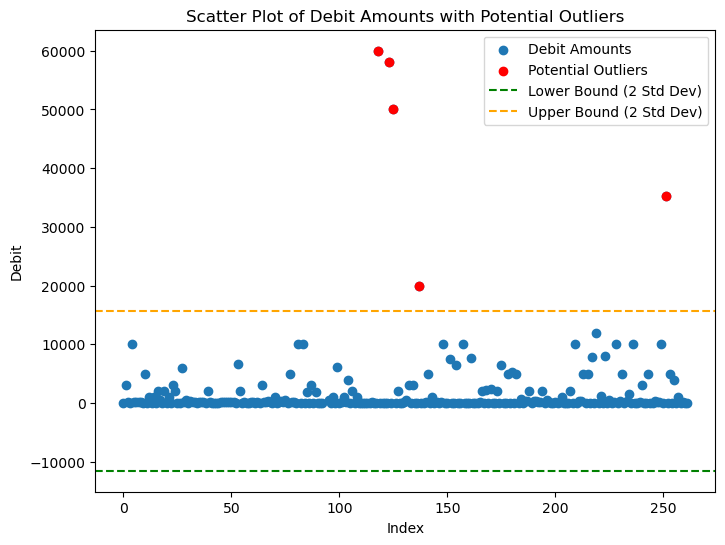

In [77]:
# Calculate mean and standard deviation of 'debit' column

mean_debit = df_main['debit'].mean()
std_debit = df_main['debit'].std()

# Calculate the upper and lower bounds for potential outliers
lower_bound = mean_debit - 2 * std_debit
upper_bound = mean_debit + 2 * std_debit

# Identify potential outliers based on the bounds
potential_outliers = df_main[(df_main['debit'] < lower_bound) | (df_main['debit'] > upper_bound)]


# Visualization

plt.figure(figsize=(8, 6))
plt.scatter(df_main.index, df_main['debit'], label='Debit Amounts')
plt.scatter(potential_outliers.index, potential_outliers['debit'], color='red', label='Potential Outliers')
plt.axhline(y=lower_bound, color='green', linestyle='--', label='Lower Bound (2 Std Dev)')
plt.axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound (2 Std Dev)')
plt.xlabel('Index')
plt.ylabel('Debit')
plt.title('Scatter Plot of Debit Amounts with Potential Outliers')
plt.legend()
plt.show()

### What is the distribution of credits and debits amounts

To answer this question, we will create separate histograms to visualize the distribution of credit and debit amounts. Histograms provide a visual representation of the frequency (or count) of different values in a dataset and help us understand the overall distribution of the data.

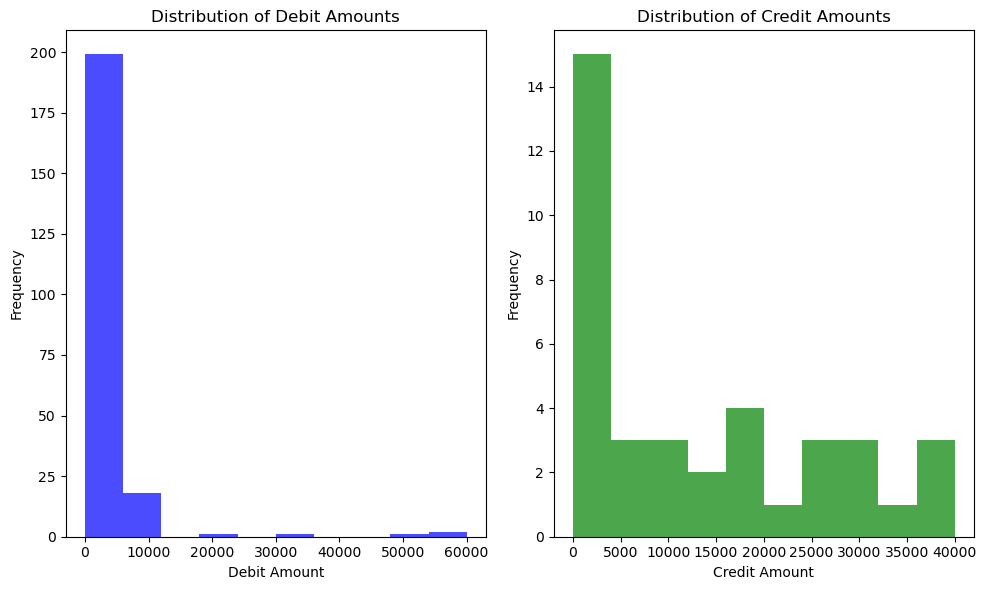

In [78]:
# Step 2: Filter out rows with zero 'debit' or 'credit' amounts
debit_df_main = df_main[df_main['debit'] != 0]
credit_df_main = df_main[df_main['credit'] != 0]


# Determin the fig size
plt.figure(figsize=(10, 6))

# Histogram for 'debit' amounts

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot in the first column
plt.hist(debit_df_main['debit'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Debit Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Debit Amounts')


# Histogram for 'credit' amounts
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot in the second column
plt.hist(credit_df_main['credit'], bins=10, color='green', alpha=0.7)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Amounts')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

From the visualization above, you can observe that
- We had almot 200 transactions 


and credit amounts and identify any patterns or outliers in the data.

### Average Daily Debits and Credits

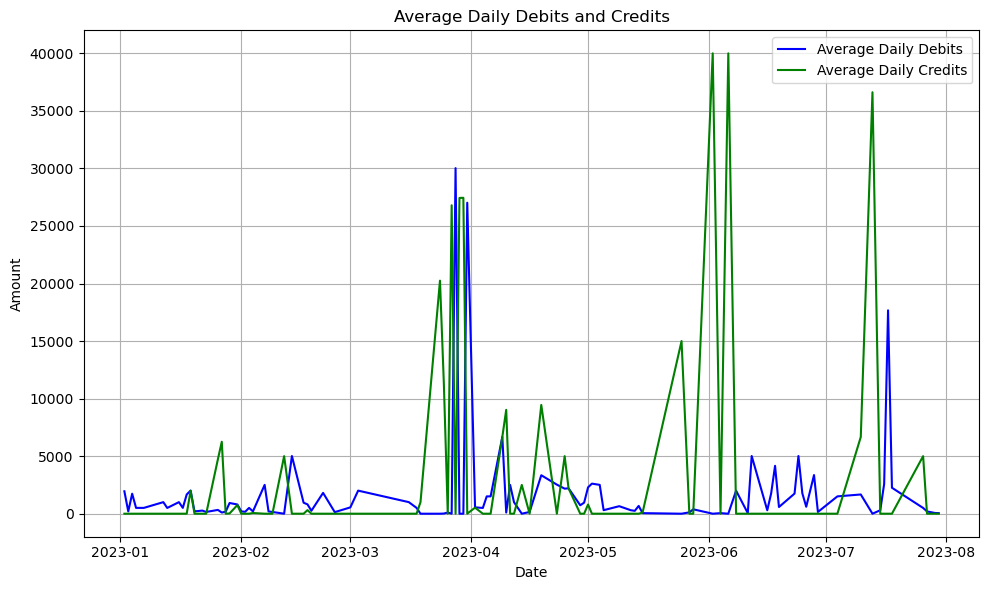

In [79]:
# Group the transactions by date and calculate the average daily debits and credits
grouped_df = df_main.groupby('date').agg({'debit': 'mean', 'credit': 'mean'}).reset_index()

# Step 4: Create a line chart to visualize the average daily debits and credits
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['date'], grouped_df['debit'], label='Average Daily Debits', color='blue')
plt.plot(grouped_df['date'], grouped_df['credit'], label='Average Daily Credits', color='green')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Average Daily Debits and Credits')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Top 5 categories with the highest total debits

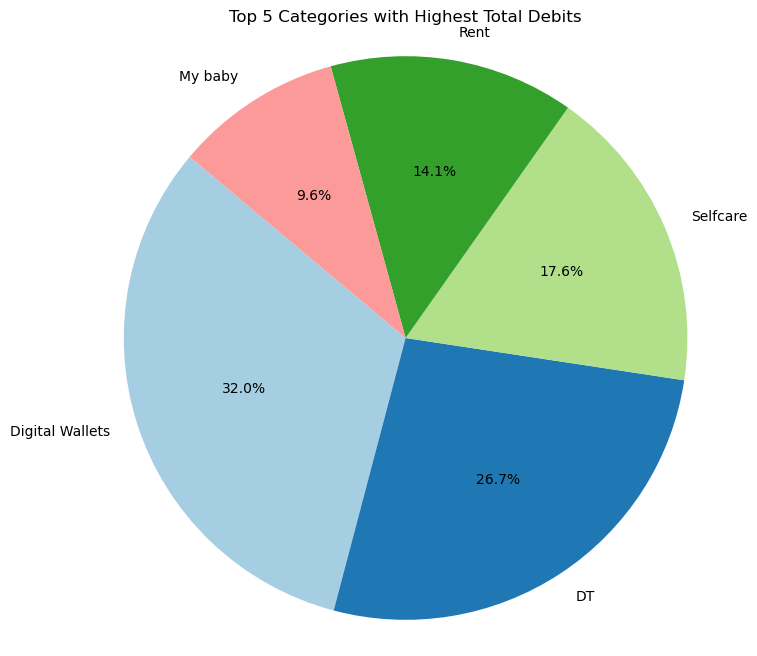

In [80]:
# Step 1: Group the transactions by the 'category' column and calculate the total debits for each category
debit_by_category = df_main[df_main['debit'] != 0].groupby('category')['debit'].sum()

# Step 2: Sort the categories based on the total debits in descending order and select the top 5 categories
top_categories = debit_by_category.nlargest(5)

# Step 3: Create a pie chart to visualize the top 5 categories with the highest total debits
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Top 5 Categories with Highest Total Debits')

plt.show()

#### Cleaned Dataset

In [81]:
df_main

,date,description,debit,credit,value date,balance,category,amount,day,month
0,2023-01-02,nip charge + vat,10.75,0.00,2023-01-02,35702.52,Bank charge,-10.75,Monday,January
1,2023-01-02,nip cr/mob/shedrach\nnwali/gomon/shedrach nwali,3000.00,0.00,2023-01-02,32702.52,Digital Wallets,-3000.00,Monday,January
2,2023-01-02,airtime//08039646573//mtn,200.00,0.00,2023-01-02,32502.52,Airtime,-200.00,Monday,January
3,2023-01-02,nip charge + vat,26.88,0.00,2023-01-02,32475.64,Bank charge,-26.88,Monday,January
4,2023-01-02,nip cr/mob/mohammad abdullahi\nsalisu/gtb/shed...,10000.00,0.00,2023-01-02,22475.64,miscellaneous,-10000.00,Monday,January
5,2023-01-02,airtime//08039646573//mtn,200.00,0.00,2023-01-02,22275.64,Airtime,-200.00,Monday,January
6,2023-01-02,airtime//08039646573//mtn,200.00,0.00,2023-01-02,22075.64,Airtime,-200.00,Monday,January
7,2023-01-03,airtime//08039646573//mtn,200.00,0.00,2023-01-03,21875.64,Airtime,-200.00,Tuesday,January
8,2023-01-04,airtime//08039646573//mtn,200.00,0.00,2023-01-04,21675.64,Airtime,-200.00,Wednesday,January
9,2023-01-04,nip charge + vat,10.75,0.00,2023-01-04,21664.89,Bank charge,-10.75,Wednesday,January


#### Export and convert file to csv format for visualization in Tableau

In [82]:
df_main.to_csv(r'C:\Users\DELL\Desktop\DataSets\bank_statement_cleaned.csv', index=False)